<img src="figures/deep-learning-keras-tensorflow.jpg" width=350>


# Keras Tutorial Overview

There is not a lot of code required, but we are going to step over it slowly so that you will know how to create your own models in the future.

The steps you are going to cover in this tutorial are as follows:
- Load Data.
- Define Keras Model.
- Compile Keras Model.
- Fit Keras Model.
- Evaluate Keras Model.
- Tie It All Together.
- Make Predictions.

The first step is to define the functions and classes we intend to use in this tutorial.

We will use the [NumPy](https://www.numpy.org/) library to load our dataset and we will use two classes from the [Keras](https://keras.io/) library to define our model.

The imports required are listed below.

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

#import warnings
#warnings.filterwarnings('ignore')

# Load Data
We can now load our dataset.

In this Keras tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

We can now load the file as a matrix of numbers using the NumPy function [loadtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).

The variables can be summarized as follows:

Input Variables (X):
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

Output Variables (y):
- Class variable (0 or 1)

Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

We can split the array into two arrays by selecting subsets of columns using the standard NumPy [slice operator](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) or “:” We can select the first 8 columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

We are now ready to define our neural network model.

Note, the dataset has 9 columns and the range 0:8 will select columns from 0 to 7, stopping before index 8. If this is new to you, then you can learn more about array slicing and ranges [here](https://github.com/dsbc2020/ml_training/tree/master/notebooks/Python-in-2-days), specifically the [NumPy](https://github.com/dsbc2020/ml_training/tree/master/notebooks/Python-in-2-days/D1_L4_NumPy) section.

In [2]:
# load the dataset
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

# Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a [Sequential model](https://keras.io/models/sequential/) and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation ([see this explination](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the [Dense class](https://keras.io/layers/core/). We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the [rectified linear unit activation function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:
- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

**Note**, the most confusing thing here is that the shape of the input to the model lis defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

In [3]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


# Visualize Model

The summary is useful for simple models, but can be confusing for models that have multiple inputs or outputs.

In [4]:
# model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


# Best Practice Tips
I generally recommend to always create a summary and a plot of your neural network model in Keras.

I recommend this for a few reasons:
- Confirm layer order. It is easy to add layers in the wrong order with the sequential API or to connect them together incorrectly with the functional API. The graph plot can help you confirm that the model is connected the way you intended.
- Confirm the output shape of each layer. It is common to have problems when defining the shape of input data for complex networks like convolutional and recurrent neural networks. The summary and plot can help you confirm the input shape to the network is as you intended.
- Confirm parameters. Some network configurations can use far fewer parameters, such as the use of a TimeDistributed wrapped Dense layer in an Encoder-Decoder recurrent neural network. Reviewing the summary can help spot cases of using far more parameters than expected.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

- model: (required) The model that you wish to plot.
- to_file: (required) The name of the file to which to save the plot.
- show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
- show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.


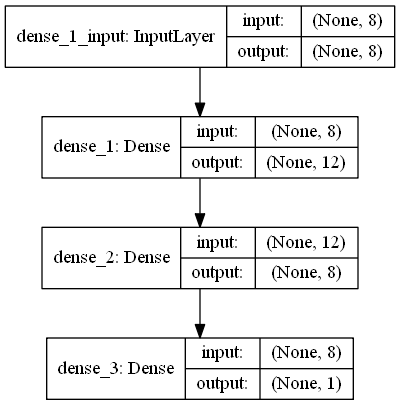

In [5]:
# Plot of Neural Network Model Graph
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compile Keras Model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. You can learn more about choosing loss functions based on your problem here:

- [How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. To learn more about the Adam version of stochastic gradient descent see the post:

- [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [6]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Keras Model

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.
- Epoch: One pass through all of the rows in the training dataset.
- Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:
- [What is the Difference Between a Batch and an Epoch in a Neural Network?](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

This is where the work happens on your CPU or GPU.

No GPU is required for this example, but if you’re interested in how to run large models on GPU hardware cheaply in the cloud, see this post:
- [How to Setup Amazon AWS EC2 GPUs to Train Keras Deep Learning Models](https://machinelearningmastery.com/develop-evaluate-large-deep-learning-models-keras-amazon-web-services/)

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# Evaluate Keras Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.


In [8]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.83


Running this example, you should see a message for each of the 150 epochs printing the loss and accuracy, followed by the final evaluation of the trained model on the training dataset.

It takes about 10 seconds to execute on my workstation running on the CPU.

Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%). This is not possible for any but the most trivial machine learning problems. Instead, we will always have some error in our model. The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset.

**Note**, the accuracy of your model will vary.

What score did you get?

Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run. This is a feature, not a bug. You can learn more about this in the post:
- [Embrace Randomness in Machine Learning](https://machinelearningmastery.com/randomness-in-machine-learning/)

The variance in the performance of the model means that to get a reasonable approximation of how well your model is performing, you may need to fit it many times and calculate the average of the accuracy scores. For more on this approach to evaluating neural networks, see the post:
- [How to Evaluate the Skill of Deep Learning Models](https://machinelearningmastery.com/evaluate-skill-deep-learning-models/)

For example, below are the accuracy scores from re-running the example 5 times:

`Accuracy: 75.00`

`Accuracy: 77.73`

`Accuracy: 77.60`

`Accuracy: 78.12`

`Accuracy: 76.17`

We can see that all accuracy scores are around 77% and the average is 76.924%.

# Make Predictions

The number one question I get asked is:
- After I train my model, how can I use it to make predictions on new data?

Great question.

We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before.

Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

For example:

In [9]:
# make probability predictions with the model
predictions = model.predict(X)

# round predictions 
rounded = [round(x[0]) for x in predictions]

Alternately, we can call the predict_classes() function on the model to predict crisp classes directly, for example:

In [10]:
# make class predictions with the model
predictions = model.predict_classes(X)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


We can see that most rows are correctly predicted. In fact, we would expect about 76.9% of the rows to be correctly predicted based on our estimated performance of the model in the previous section.